# WeatherPy
----

#Data observations

1.All observations from the dataset should be taken with a grain of salt as 
the data is for a single moment in time and don't necessarily reflect weather patterns over any amount of time.

2.The northern hemisphere will dominate the data somewhat as it is a more populous location due to more available landmass. This also allows a wider range of weather conditions as the landmass goes much closer to the pole.

3.There is some room for skepticism with certain datapoints and human data input. Being cautious about the scientific consistency regarding cloud coverage is wise. The data trends heavily around round numbers (divisble by 10) and then clusters again at 75%, which is number that humans tend to associate heavily with. Stripping out these numbers may yield a more useful dataset.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date as dt
from scipy.stats import linregress

#define the date the program is run for logging purposes
today = dt.today()

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
Cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#using capital 'C' for 'Cities' to avoid confusion with 'for city in cities later'
for lat_lng in lat_lngs:
    City = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if City not in Cities:
        Cities.append(City)

# Print the city count to confirm sufficient count
len(Cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#make empty lists to store the data pulled from inquiry
cities = []
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
dates = []
cnt = []

#make a dictionary of lists to create the dataframe from later
weather_dict = {
    'City': cities,
    'Lat': lat,
    'Long': lng,
    'Country':cnt,
    'Max Temp': temp,
    'Humidity': humid,
    'Cloud Cover %': cloud,
    'Wind Speed': wind,
    'Dates': dates
}

# Create the for loop to query OpenWeatherMap
#create records as inquiries are made

#create empty value to track and manage queries
record = 1
batch = 1

# Loop through the list of cities and perform a request for data on each
for City in Cities:
    
    # Build query url
    query_url = f"{url}appid={api_key}&units={units}&q={City}"
    
    #determine if the program needs to sleep to avoid overloading API maximums
    if record <= 50:
        
        #attempt to acquire the relevant stats from the api
        try:           
            #acquire all the relevant stats
            response = requests.get(query_url).json()
            cities.append(response['name'])
            lat.append(float(response['coord']['lat']))
            lng.append(float(response['coord']['lon']))
            temp.append(float(response['main']['temp_max'])) 
            humid.append(int(response['main']['humidity']))
            cloud.append(int(response['clouds']['all']))
            wind.append(float(response['wind']['speed']))
            cnt.append(response['sys']['country'])
            dates.append(response['dt'])
            
            print(f"Acquiring Record {record} of Batch {batch} | {City}")
            
            #increment the record count
            record += 1
        
        #handle exceptions if the city isn't found
        except:
            print(f"In Batch {batch}, Record {record}, City named: {City} not found! Going to next city")
            
            #increment the record count
            record += 1
            
            continue
            
    #if the queries are too close the the 60-per-minute query limit
    else:
        print (f'Batch {batch} completed!')
        #increment the batch count
        batch += 1
        #reset the record count
        record = 1
        #sleep the for loop for a minute
        time.sleep(60) 
        
#print the notice that the query loop is ending as the list ends
print('City Data Acquired')

Acquiring Record 1 of Batch 1 | atuona
Acquiring Record 2 of Batch 1 | castro
Acquiring Record 3 of Batch 1 | carnarvon
Acquiring Record 4 of Batch 1 | saskylakh
Acquiring Record 5 of Batch 1 | hermanus
Acquiring Record 6 of Batch 1 | banjar
Acquiring Record 7 of Batch 1 | yacuiba
Acquiring Record 8 of Batch 1 | tabou
Acquiring Record 9 of Batch 1 | yar-sale
Acquiring Record 10 of Batch 1 | thompson
Acquiring Record 11 of Batch 1 | ushuaia
Acquiring Record 12 of Batch 1 | constitucion
Acquiring Record 13 of Batch 1 | taoudenni
In Batch 1, Record 14, City named: karakose not found! Going to next city
Acquiring Record 15 of Batch 1 | salamiyah
Acquiring Record 16 of Batch 1 | nago
Acquiring Record 17 of Batch 1 | timra
Acquiring Record 18 of Batch 1 | lata
In Batch 1, Record 19, City named: mys shmidta not found! Going to next city
Acquiring Record 20 of Batch 1 | bredasdorp
Acquiring Record 21 of Batch 1 | makinsk
Acquiring Record 22 of Batch 1 | punta arenas
Acquiring Record 23 of Batc

Acquiring Record 34 of Batch 4 | la ronge
Acquiring Record 35 of Batch 4 | bambous virieux
Acquiring Record 36 of Batch 4 | sao felix do xingu
Acquiring Record 37 of Batch 4 | yairipok
Acquiring Record 38 of Batch 4 | hovd
Acquiring Record 39 of Batch 4 | kudahuvadhoo
In Batch 4, Record 40, City named: malwan not found! Going to next city
Acquiring Record 41 of Batch 4 | betanzos
Acquiring Record 42 of Batch 4 | new norfolk
Acquiring Record 43 of Batch 4 | santa maria
Acquiring Record 44 of Batch 4 | portland
Acquiring Record 45 of Batch 4 | manzhouli
Acquiring Record 46 of Batch 4 | daru
Acquiring Record 47 of Batch 4 | esperance
Acquiring Record 48 of Batch 4 | iglino
Acquiring Record 49 of Batch 4 | salalah
Acquiring Record 50 of Batch 4 | srednekolymsk
Batch 4 completed!
Acquiring Record 1 of Batch 5 | bunda
Acquiring Record 2 of Batch 5 | bengkulu
Acquiring Record 3 of Batch 5 | geraldton
Acquiring Record 4 of Batch 5 | moyale
Acquiring Record 5 of Batch 5 | maua
Acquiring Record 

Acquiring Record 19 of Batch 8 | leningradskiy
Acquiring Record 20 of Batch 8 | mashivka
Acquiring Record 21 of Batch 8 | nhulunbuy
Acquiring Record 22 of Batch 8 | vilhena
Acquiring Record 23 of Batch 8 | olafsvik
Acquiring Record 24 of Batch 8 | yerbogachen
Acquiring Record 25 of Batch 8 | saint-leu
Acquiring Record 26 of Batch 8 | longyearbyen
In Batch 8, Record 27, City named: nylstroom not found! Going to next city
Acquiring Record 28 of Batch 8 | sangar
Acquiring Record 29 of Batch 8 | medicine hat
Acquiring Record 30 of Batch 8 | beyneu
Acquiring Record 31 of Batch 8 | constantine
Acquiring Record 32 of Batch 8 | egvekinot
Acquiring Record 33 of Batch 8 | narsipatnam
Acquiring Record 34 of Batch 8 | lodwar
Acquiring Record 35 of Batch 8 | chapais
Acquiring Record 36 of Batch 8 | pilane
Acquiring Record 37 of Batch 8 | kovdor
Acquiring Record 38 of Batch 8 | kungurtug
Acquiring Record 39 of Batch 8 | paraiso
Acquiring Record 40 of Batch 8 | periyapatti
Acquiring Record 41 of Batc

Acquiring Record 50 of Batch 11 | rantepao
Batch 11 completed!
Acquiring Record 1 of Batch 12 | huarmey
Acquiring Record 2 of Batch 12 | kanbe
Acquiring Record 3 of Batch 12 | nandu
Acquiring Record 4 of Batch 12 | kutum
Acquiring Record 5 of Batch 12 | lichinga
Acquiring Record 6 of Batch 12 | berberati
Acquiring Record 7 of Batch 12 | koson
Acquiring Record 8 of Batch 12 | matay
Acquiring Record 9 of Batch 12 | kimbe
Acquiring Record 10 of Batch 12 | sand
Acquiring Record 11 of Batch 12 | javanrud
Acquiring Record 12 of Batch 12 | seoul
Acquiring Record 13 of Batch 12 | shingu
Acquiring Record 14 of Batch 12 | tiksi
Acquiring Record 15 of Batch 12 | haines junction
Acquiring Record 16 of Batch 12 | beloha
Acquiring Record 17 of Batch 12 | ribeira brava
Acquiring Record 18 of Batch 12 | luau
Acquiring Record 19 of Batch 12 | harare
Acquiring Record 20 of Batch 12 | jeremie
Acquiring Record 21 of Batch 12 | marystown
Acquiring Record 22 of Batch 12 | santa fe
Acquiring Record 23 of Bat

### Convert Raw Data to DataFrame

In [4]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Long,Country,Max Temp,Humidity,Cloud Cover %,Wind Speed,Dates
0,Atuona,-9.8000,-139.0333,PF,77.59,72,15,15.84,1643404950
1,Castro,-24.7911,-50.0119,BR,61.97,99,100,7.29,1643405004
2,Carnarvon,-24.8667,113.6333,AU,69.87,88,0,5.75,1643404949
3,Saskylakh,71.9167,114.0833,RU,0.93,89,100,6.04,1643405020
4,Hermanus,-34.4187,19.2345,ZA,63.81,76,0,11.45,1643404920


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
weather_data_clean = weather_data[weather_data.Humidity <= 100]
weather_data_clean.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

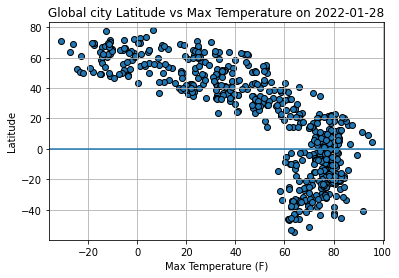

In [6]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Global city Latitude vs Max Temperature on {today}'
plt.title(f'Global city Latitude vs Max Temperature on {today}')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
y_min, y_max = min(weather_data_clean['Lat'])-5, max(weather_data_clean['Lat'])+5
x_min, x_max = min(weather_data_clean['Max Temp'])-5,max(weather_data_clean['Max Temp'])+5

#create the scatter plot
plt.scatter(weather_data_clean['Max Temp'],weather_data_clean['Lat'],edgecolors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()
plt.savefig(f'../output_data/{title}.png')
plt.show()

## Latitude vs. Humidity Plot

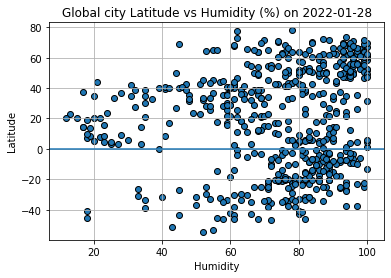

In [7]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Global city Latitude vs Humidity (%) on {today}'
plt.title(title)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
y_min, y_max = min(weather_data_clean['Lat'])-5, max(weather_data_clean['Lat'])+5
x_min, x_max = min(weather_data_clean['Humidity'])-5,max(weather_data_clean['Humidity'])+5

#create the scatter plot
plt.scatter(weather_data_clean['Humidity'],weather_data_clean['Lat'],edgecolors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()
plt.savefig(f'../output_data/{title}.png')
plt.show()

## Latitude vs. Cloudiness Plot

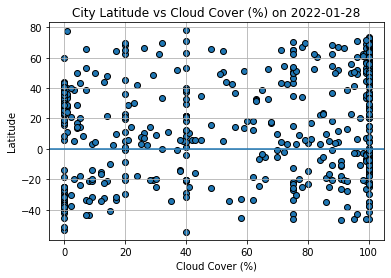

In [8]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Global city Latitude vs Cloud Cover (%) on {today}'
plt.title(f'City Latitude vs Cloud Cover (%) on {today}')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')
y_min, y_max = min(weather_data_clean['Lat'])-5, max(weather_data_clean['Lat'])+5
x_min, x_max = min(weather_data_clean['Cloud Cover %'])-5,max(weather_data_clean['Cloud Cover %'])+5

#create the scatter plot
plt.scatter(weather_data_clean['Cloud Cover %'],weather_data_clean['Lat'],edgecolors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()
plt.savefig(f'../output_data/{title}.png')
plt.show()

## Latitude vs. Wind Speed Plot

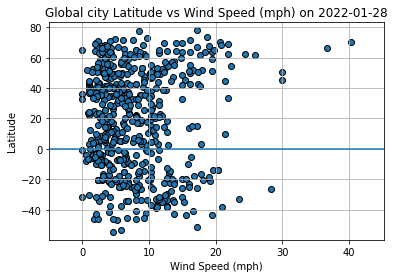

In [9]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Global city Latitude vs Wind Speed (mph) on {today}'
plt.title(title)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
y_min, y_max = min(weather_data_clean['Lat'])-5, max(weather_data_clean['Lat'])+5
x_min, x_max = min(weather_data_clean['Wind Speed'])-5,max(weather_data_clean['Wind Speed'])+5

#create the scatter plot
plt.scatter(weather_data_clean['Wind Speed'],weather_data_clean['Lat'],edgecolors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()
plt.savefig(f'../output_data/{title}.png')
plt.show()

In [10]:
#make a dataframe each for the northern and souther hemispheres
weather_data_north = weather_data_clean[weather_data_clean['Lat']>0]
weather_data_south = weather_data_clean[weather_data_clean['Lat']<0]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

           The r-value is -0.8506947980622575


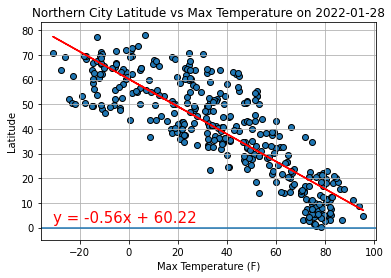

In [11]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Northern City Latitude vs Max Temperature on {today}'
plt.title(title)
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_north['Lat']
x_values = weather_data_north['Max Temp']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_min+7),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show the and save plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

           The r-value is 0.3464209378350202


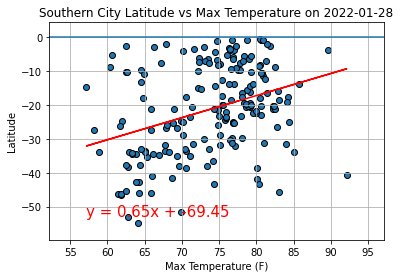

In [12]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Southern City Latitude vs Max Temperature on {today}'
plt.title(title)
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_south['Lat']
x_values = weather_data_south['Max Temp']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_min+7),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

           The r-value is 0.3836505320190303


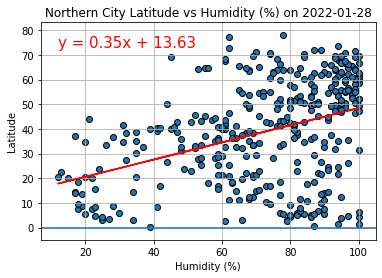

In [13]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Northern City Latitude vs Humidity (%) on {today}'
plt.title(title)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_north['Lat']
x_values = weather_data_north['Humidity']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_max-10),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

           The r-value is 0.5040565298790463


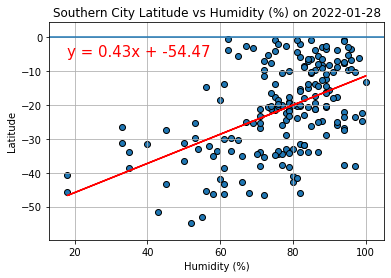

In [14]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Southern City Latitude vs Humidity (%) on {today}'
plt.title(title)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_south['Lat']
x_values = weather_data_south['Humidity']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_max-10),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

           The r-value is 0.3661510391151847


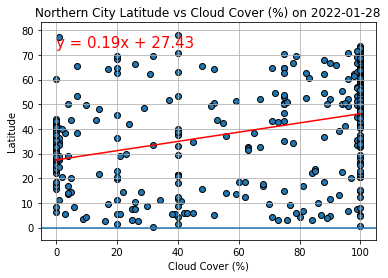

In [15]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Northern City Latitude vs Cloud Cover (%) on {today}'
plt.title(title)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_north['Lat']
x_values = weather_data_north['Cloud Cover %']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_max-10),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

           The r-value is 0.4464206113451711


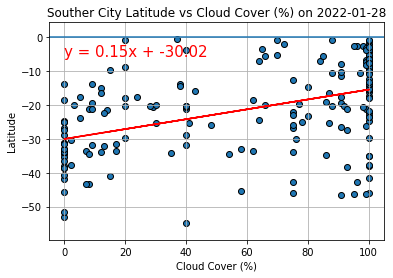

In [16]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Souther City Latitude vs Cloud Cover (%) on {today}'
plt.title(title)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_south['Lat']
x_values = weather_data_south['Cloud Cover %']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+5,y_max-10),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

           The r-value is 0.2213819600364919


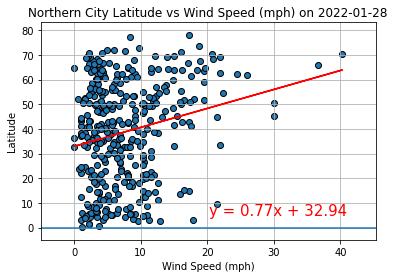

In [25]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Northern City Latitude vs Wind Speed (mph) on {today}'
plt.title(title)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_north['Lat']
x_values = weather_data_north['Wind Speed']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_max-25,y_min+10),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

           The r-value is -0.28771738473310354


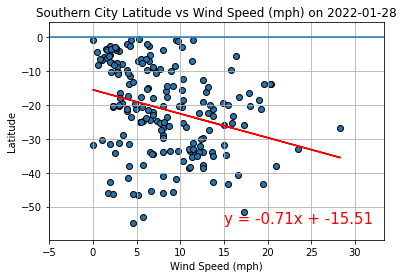

In [24]:
#label the plot and establish referencable variables to manipulate presentation
title = f'Southern City Latitude vs Wind Speed (mph) on {today}'
plt.title(title)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#establish lists to go into plot and regression model
y_values = weather_data_south['Lat']
x_values = weather_data_south['Wind Speed']

y_min, y_max = min(y_values)-5, max(y_values)+5
x_min, x_max = min(x_values)-5,max(x_values)+5

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot and show the regression
plt.scatter(x_values,
            y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_min+20,y_min+5),fontsize=15,color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.hlines(0,x_min,x_max)
plt.grid()

#print the r value and show and save the plot
print(f'           The r-value is {rvalue}')
plt.savefig(f'../output_data/{title}.png')
plt.show()